# Andamento dei ricoveri e dei guariti.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('../covid-19-marche.csv', header=0, parse_dates=True)

# Convert data to European format
data['data'] = pd.to_datetime(data['data']).dt.strftime('%d/%m/%Y')

last_update = data['data'][data.index[-1]]

LETTI_TI_2018 = 115
LETTI_TI_2020 = 169

---

In [2]:
# Info
print('----- Dati aggiornati al: ' + str(last_update) + ' -----')
print('\n- Totale persone attualmente positive: ' + str(int(data['malati_attivi_persone'][data.index[-1]])))
print('- Media di persone dimesse o guarite ogni giorno: ' + str(int(data['malati_dimessi_guariti'].diff().replace(0, np.NaN).mean())))
print('- Casi e contatti attualmente in isolamento domiciliare: ' + str(int(data['malati_quarantena_domiciliare_attivi_totali'][data.index[-1]])))
print('- Totale dei casi e dei contatti in isolamento domiciliare dall\'inizio dell\'epidemia: ' + str(int(data['malati_quarantena_domiciliare_totali'][data.index[-1]])))

----- Dati aggiornati al: 05/06/2020 -----

- Totale persone attualmente positive: 1293
- Media di persone dimesse o guarite ogni giorno: 60
- Casi e contatti attualmente in isolamento domiciliare: 1959
- Totale dei casi e dei contatti in isolamento domiciliare dall'inizio dell'epidemia: 34337


---

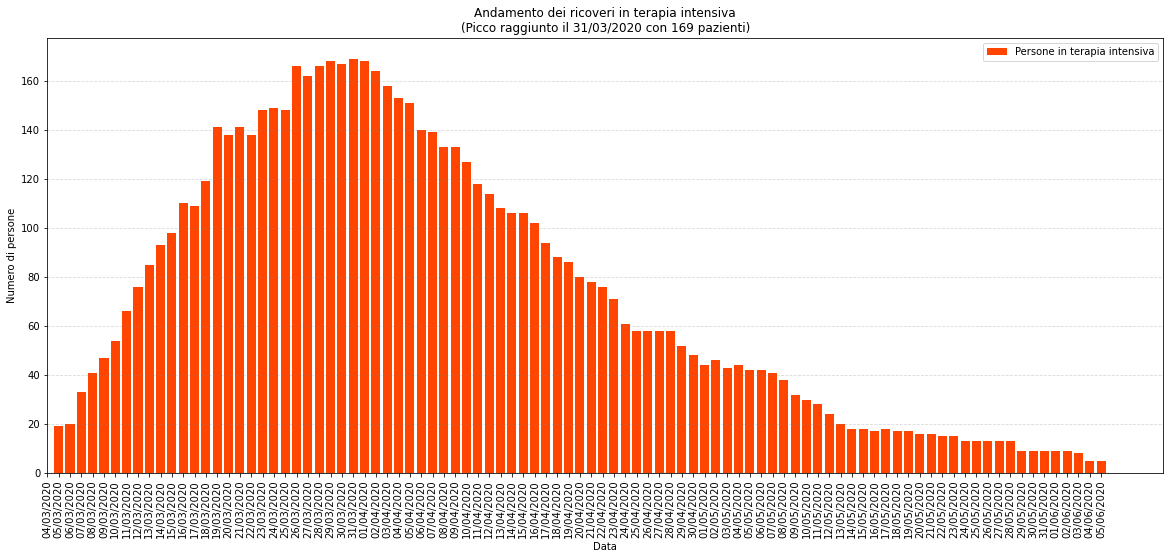

In [3]:
d0  = data['malati_attivi_ricoverati_terapia_intensiva_totali']
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d0, label='Persone in terapia intensiva', color='orangered')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento dei ricoveri in terapia intensiva' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8) # Remove data from 25-02 to 03-03
plt.savefig('images/andamento-ricoveri-01.png', bbox_inches='tight')
plt.show()

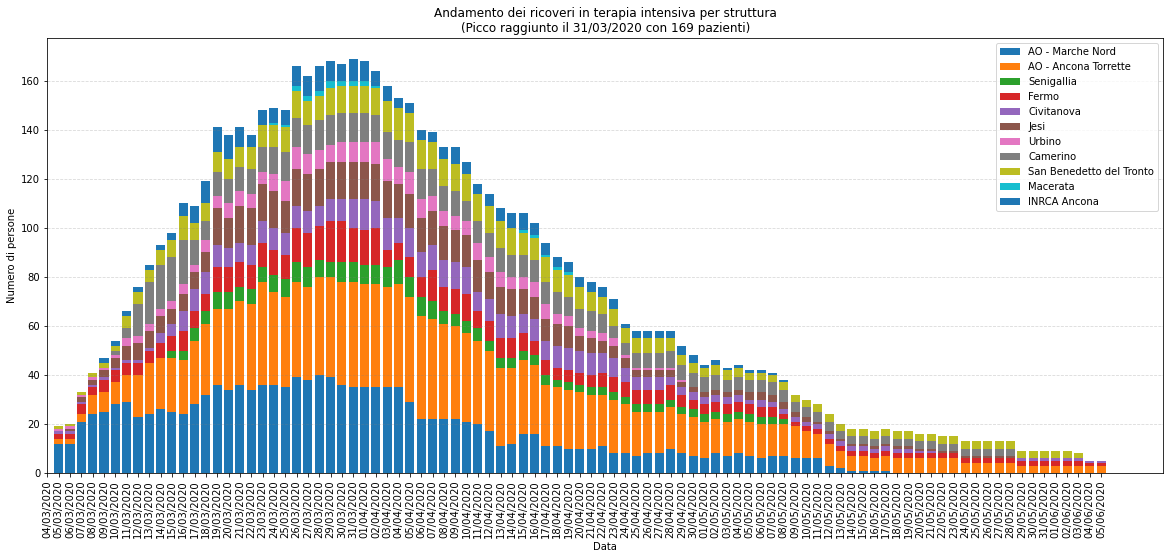

In [4]:
d0  = data['malati_attivi_ricoverati_terapia_intensiva_totali']
d1  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_AO_Marche_Nord']
d2  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_AO_Ancona_Torrette']
d3  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Senigallia']
d4  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Fermo']
d5  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Civitanova']
d6  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Jesi']
d7  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Urbino']
d8  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Camerino']
d9  = data['malati_attivi_ricoverati_terapia_intensiva_strutture_San_Benedetto_dT']
d10 = data['malati_attivi_ricoverati_terapia_intensiva_strutture_Macerata']
d11 = data['malati_attivi_ricoverati_terapia_intensiva_strutture_INRCA_Ancona']

bars2 = np.add(d1, d2).tolist()
bars3 = np.add(bars2, d3).tolist()
bars4 = np.add(bars3, d4).tolist()
bars5 = np.add(bars4, d5).tolist()
bars6 = np.add(bars5, d6).tolist()
bars7 = np.add(bars6, d7).tolist()
bars8 = np.add(bars7, d8).tolist()
bars9 = np.add(bars8, d9).tolist()
bars10 = np.add(bars9, d10).tolist()

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d1, label='AO - Marche Nord')
ax.bar(data['data'], d2, label='AO - Ancona Torrette', bottom=d1)
ax.bar(data['data'], d3, label='Senigallia', bottom=bars2)
ax.bar(data['data'], d4, label='Fermo', bottom=bars3)
ax.bar(data['data'], d5, label='Civitanova', bottom=bars4)
ax.bar(data['data'], d6, label='Jesi', bottom=bars5)
ax.bar(data['data'], d7, label='Urbino', bottom=bars6)
ax.bar(data['data'], d8, label='Camerino', bottom=bars7)
ax.bar(data['data'], d9, label='San Benedetto del Tronto', bottom=bars8)
ax.bar(data['data'], d10, label='Macerata', bottom=bars9)
ax.bar(data['data'], d11, label='INRCA Ancona', bottom=bars10)
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento dei ricoveri in terapia intensiva per struttura' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8) # Remove data from 25-02 to 03-03
plt.savefig('images/andamento-ricoveri-02.png', bbox_inches='tight')
plt.show()

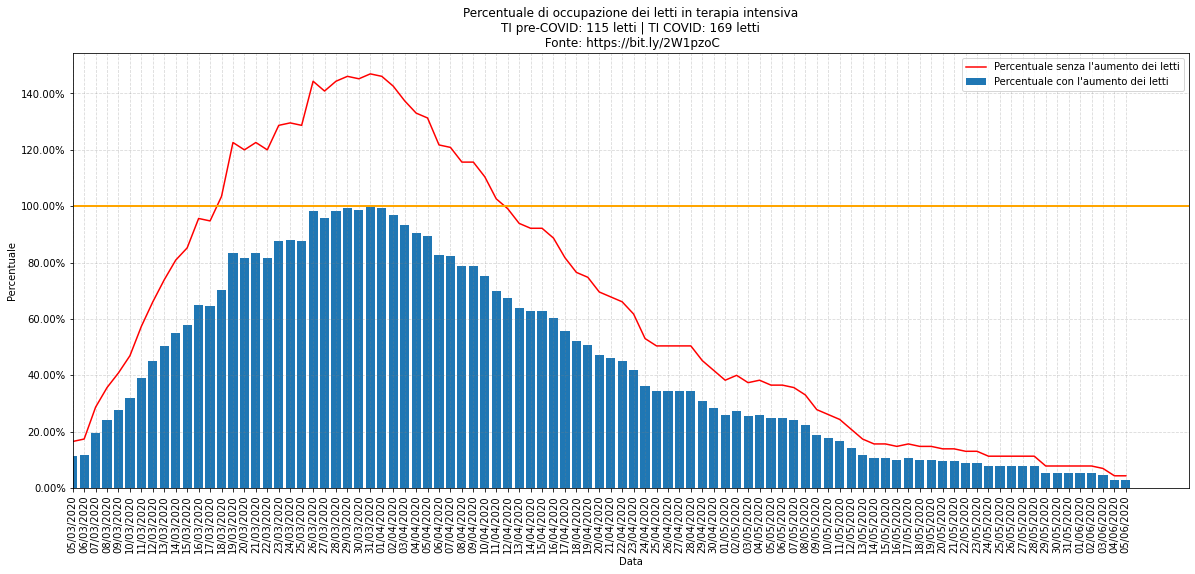

In [5]:
d0  = data['malati_attivi_ricoverati_terapia_intensiva_totali'] / LETTI_TI_2020
d1  = data['malati_attivi_ricoverati_terapia_intensiva_totali'] / LETTI_TI_2018
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d0, label='Percentuale con l\'aumento dei letti')
ax.plot(data['data'], d1, label='Percentuale senza l\'aumento dei letti', color='red')
ax.set_xlabel('Data')
ax.set_ylabel('Percentuale')
info = '\nTI pre-COVID: ' + str(LETTI_TI_2018) + ' letti | TI COVID: ' + str(LETTI_TI_2020) + ' letti\n Fonte: https://bit.ly/2W1pzoC'
ax.set_title('Percentuale di occupazione dei letti in terapia intensiva' + info)
ax.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

ax.axhline(y=1, color='orange', linewidth=2)
plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=9)  # Remove data from 25-02 to 04-03
plt.savefig('images/andamento-ricoveri-03.png', bbox_inches='tight')
plt.show()

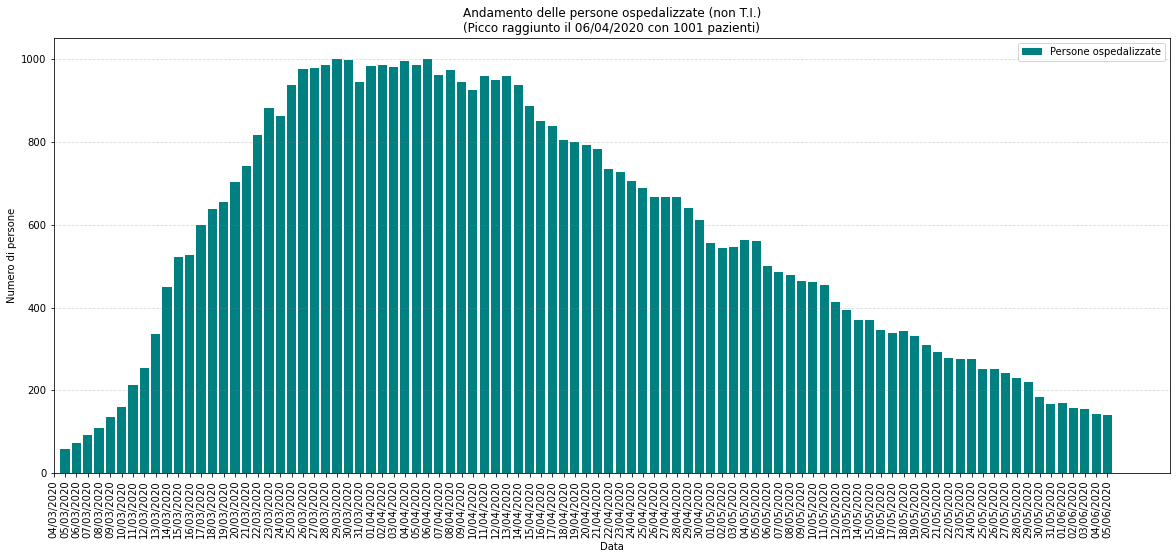

In [6]:
d0 = data['malati_attivi_ricoverati_semi_intensiva_totali'] + data['malati_attivi_ricoverati_post_critica_totali'] + data['malati_attivi_ricoverati_non_intensiva_totali']
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d0, label='Persone ospedalizzate', color='teal')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.legend()
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento delle persone ospedalizzate (non T.I.)' + info)

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8) # Remove data from 25-02 to 03-03
plt.savefig('images/andamento-ricoveri-04.png', bbox_inches='tight')
plt.show()

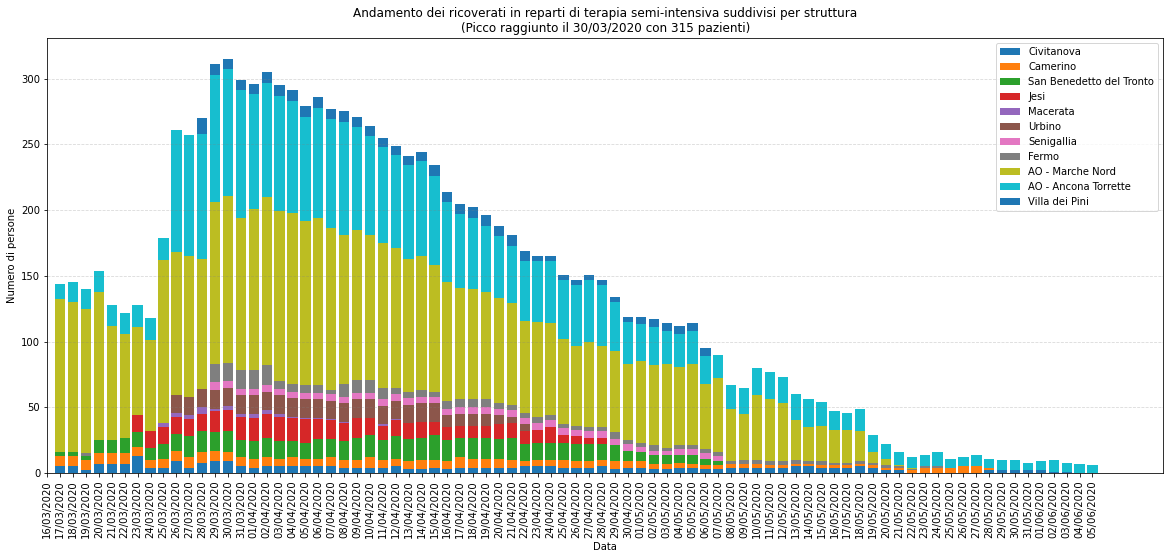

In [7]:
d0  = data['malati_attivi_ricoverati_semi_intensiva_totali']
d1  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Civitanova']
d2  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Camerino']
d3  = data['malati_attivi_ricoverati_semi_intensiva_strutture_San_Benedetto_dT']
d4  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Jesi']
d5  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Macerata']
d6  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Urbino']
d7  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Senigallia']
d8  = data['malati_attivi_ricoverati_semi_intensiva_strutture_Fermo']
d9  = data['malati_attivi_ricoverati_semi_intensiva_strutture_AO_Marche_Nord']
d10 = data['malati_attivi_ricoverati_semi_intensiva_strutture_AO_Ancona_Torrette']
d11 = data['malati_attivi_ricoverati_semi_intensiva_strutture_Villa_Pini']

bars2 = np.add(d1, d2).tolist()
bars3 = np.add(bars2, d3).tolist()
bars4 = np.add(bars3, d4).tolist()
bars5 = np.add(bars4, d5).tolist()
bars6 = np.add(bars5, d6).tolist()
bars7 = np.add(bars6, d7).tolist()
bars8 = np.add(bars7, d8).tolist()
bars9 = np.add(bars8, d9).tolist()
bars10 = np.add(bars9, d10).tolist()

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d1, label='Civitanova')
ax.bar(data['data'], d2, label='Camerino', bottom=d1)
ax.bar(data['data'], d3, label='San Benedetto del Tronto', bottom=bars2)
ax.bar(data['data'], d4, label='Jesi', bottom=bars3)
ax.bar(data['data'], d5, label='Macerata', bottom=bars4)
ax.bar(data['data'], d6, label='Urbino', bottom=bars5)
ax.bar(data['data'], d7, label='Senigallia', bottom=bars6)
ax.bar(data['data'], d8, label='Fermo', bottom=bars7)
ax.bar(data['data'], d9, label='AO - Marche Nord', bottom=bars8)
ax.bar(data['data'], d10, label='AO - Ancona Torrette', bottom=bars9)
ax.bar(data['data'], d11, label='Villa dei Pini', bottom=bars10)
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento dei ricoverati in reparti di terapia semi-intensiva suddivisi per struttura' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=20) # Remove data from 25-02 to 15-03
plt.savefig('images/andamento-ricoveri-05.png', bbox_inches='tight')
plt.show()

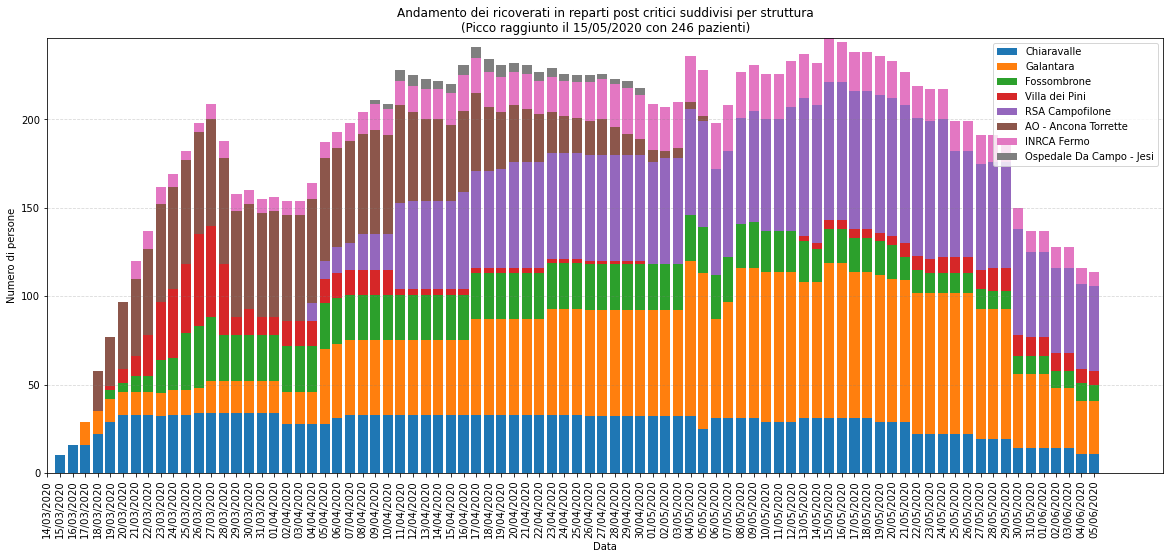

In [8]:
d0  = data['malati_attivi_ricoverati_post_critica_totali']
d1  = data['malati_attivi_ricoverati_post_critica_strutture_Chiaravalle']
d2  = data['malati_attivi_ricoverati_post_critica_strutture_Galantara']
d3  = data['malati_attivi_ricoverati_post_critica_strutture_Fossombrone']
d4  = data['malati_attivi_ricoverati_post_critica_strutture_Villa_Pini']
d5  = data['malati_attivi_ricoverati_post_critica_strutture_RSA_Campofilone']
d6  = data['malati_attivi_ricoverati_post_critica_strutture_AO_Ancona_Torrette']
d7  = data['malati_attivi_ricoverati_post_critica_strutture_INRCA_Fermo']
d8  = data['malati_attivi_ricoverati_post_critica_strutture_OspedaleDaCampo_Jesi']

bars2 = np.add(d1, d2).tolist()
bars3 = np.add(bars2, d3).tolist()
bars4 = np.add(bars3, d4).tolist()
bars5 = np.add(bars4, d5).tolist()
bars6 = np.add(bars5, d6).tolist()
bars7 = np.add(bars6, d7).tolist()

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d1, label='Chiaravalle')
ax.bar(data['data'], d2, label='Galantara', bottom=d1)
ax.bar(data['data'], d3, label='Fossombrone', bottom=bars2)
ax.bar(data['data'], d4, label='Villa dei Pini', bottom=bars3)
ax.bar(data['data'], d5, label='RSA Campofilone', bottom=bars4)
ax.bar(data['data'], d6, label='AO - Ancona Torrette', bottom=bars5)
ax.bar(data['data'], d7, label='INRCA Fermo', bottom=bars6)
ax.bar(data['data'], d8, label='Ospedale Da Campo - Jesi', bottom=bars7)
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento dei ricoverati in reparti post critici suddivisi per struttura' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=18) # Remove data from 25-02 to 13-03
plt.savefig('images/andamento-ricoveri-06.png', bbox_inches='tight')
plt.show()

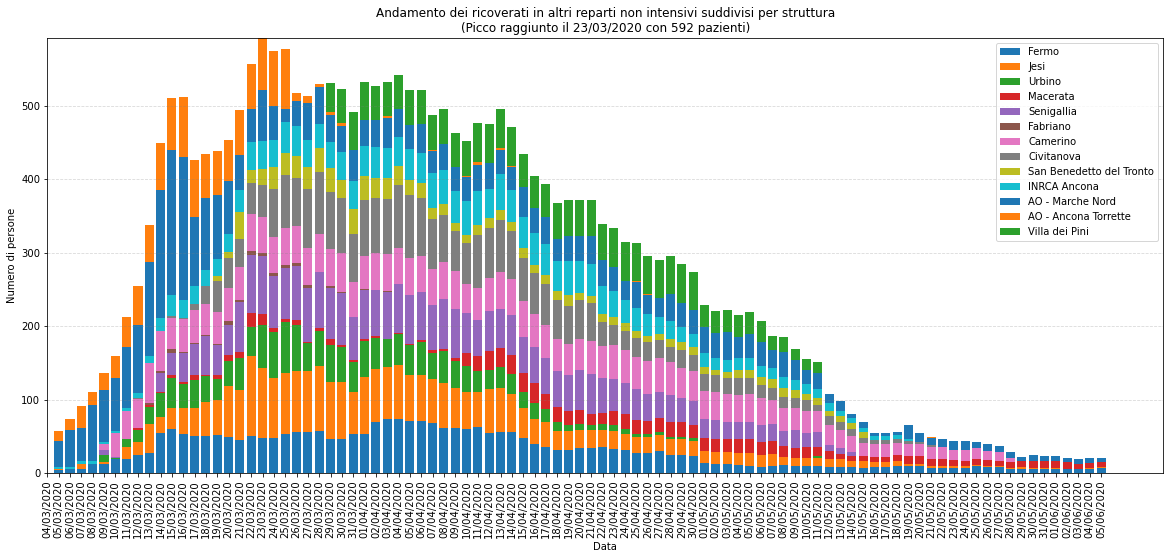

In [9]:
d0  = data['malati_attivi_ricoverati_non_intensiva_totali']
d1  = data['malati_attivi_ricoverati_non_intensiva_strutture_Fermo']
d2  = data['malati_attivi_ricoverati_non_intensiva_strutture_Jesi']
d3  = data['malati_attivi_ricoverati_non_intensiva_strutture_Urbino']
d4  = data['malati_attivi_ricoverati_non_intensiva_strutture_Macerata']
d5  = data['malati_attivi_ricoverati_non_intensiva_strutture_Senigallia']
d6  = data['malati_attivi_ricoverati_non_intensiva_strutture_Fabriano']
d7  = data['malati_attivi_ricoverati_non_intensiva_strutture_Camerino']
d8  = data['malati_attivi_ricoverati_non_intensiva_strutture_Civitanova']
d9  = data['malati_attivi_ricoverati_non_intensiva_strutture_San_Benedetto_dT']
d10 = data['malati_attivi_ricoverati_non_intensiva_strutture_INRCA_Ancona']
d11 = data['malati_attivi_ricoverati_non_intensiva_strutture_AO_Marche_Nord']
d12 = data['malati_attivi_ricoverati_non_intensiva_strutture_AO_Ancona_Torrette']
d13 = data['malati_attivi_ricoverati_non_intensiva_strutture_Villa_Pini']

bars2 = np.add(d1, d2).tolist()
bars3 = np.add(bars2, d3).tolist()
bars4 = np.add(bars3, d4).tolist()
bars5 = np.add(bars4, d5).tolist()
bars6 = np.add(bars5, d6).tolist()
bars7 = np.add(bars6, d7).tolist()
bars8 = np.add(bars7, d8).tolist()
bars9 = np.add(bars8, d9).tolist()
bars10 = np.add(bars9, d10).tolist()
bars11 = np.add(bars10, d11).tolist()
bars12 = np.add(bars11, d12).tolist()

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d1, label='Fermo')
ax.bar(data['data'], d2, label='Jesi', bottom=d1)
ax.bar(data['data'], d3, label='Urbino', bottom=bars2)
ax.bar(data['data'], d4, label='Macerata', bottom=bars3)
ax.bar(data['data'], d5, label='Senigallia', bottom=bars4)
ax.bar(data['data'], d6, label='Fabriano', bottom=bars5)
ax.bar(data['data'], d7, label='Camerino', bottom=bars6)
ax.bar(data['data'], d8, label='Civitanova', bottom=bars7)
ax.bar(data['data'], d9, label='San Benedetto del Tronto', bottom=bars8)
ax.bar(data['data'], d10, label='INRCA Ancona', bottom=bars9)
ax.bar(data['data'], d11, label='AO - Marche Nord', bottom=bars10)
ax.bar(data['data'], d12, label='AO - Ancona Torrette', bottom=bars11)
ax.bar(data['data'], d13, label='Villa dei Pini', bottom=bars12)
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento dei ricoverati in altri reparti non intensivi suddivisi per struttura' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8) # Remove data from 25-02 to 03-03
plt.savefig('images/andamento-ricoveri-07.png', bbox_inches='tight')
plt.show()

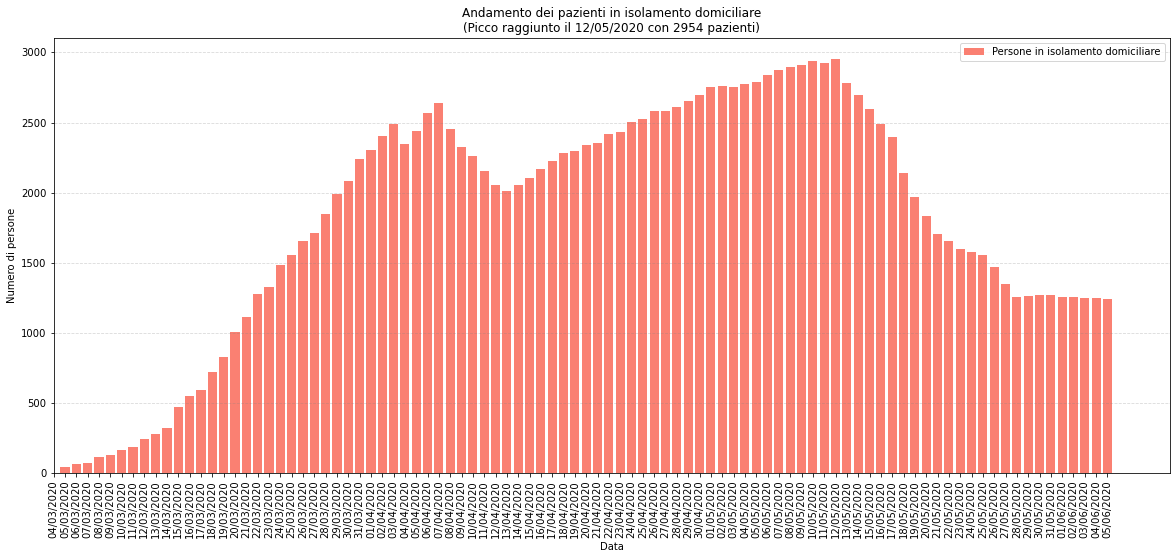

In [10]:
d0 = data['malati_attivi_isolamento_domiciliare']
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], d0, color='salmon', label='Persone in isolamento domiciliare')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.legend()
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Andamento dei pazienti in isolamento domiciliare' + info)

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8) # Remove data from 25-02 to 03-03
plt.savefig('images/andamento-ricoveri-08.png', bbox_inches='tight')
plt.show()

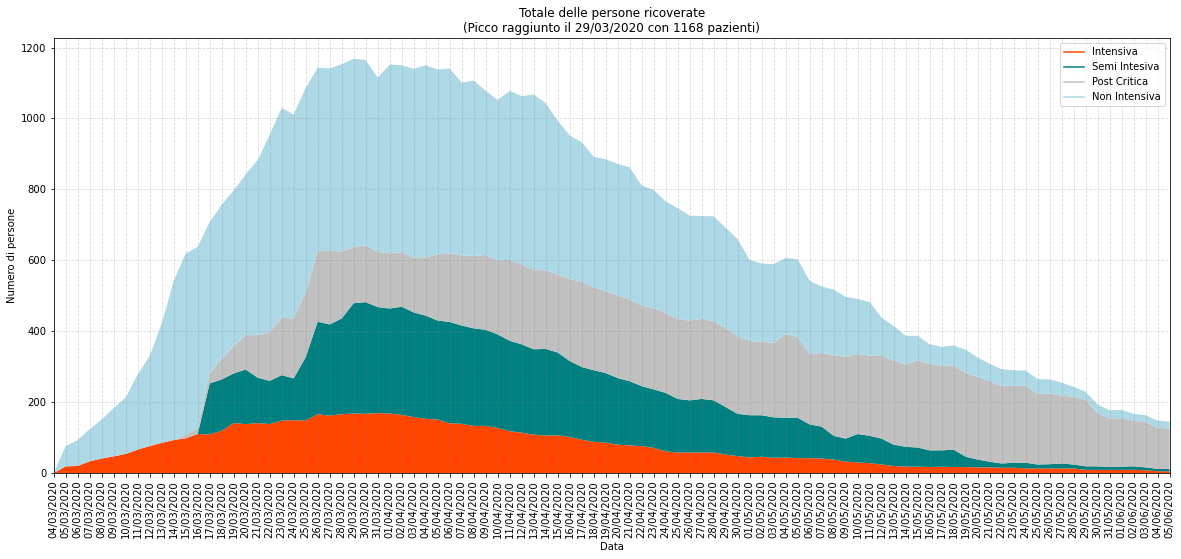

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
d0 = data['malati_attivi_ricoverati_totali']
d1 = data['malati_attivi_ricoverati_terapia_intensiva_totali']
d2 = data['malati_attivi_ricoverati_semi_intensiva_totali']
d3 = data['malati_attivi_ricoverati_post_critica_totali']
d4 = data['malati_attivi_ricoverati_non_intensiva_totali']

plt.plot([],[], color='orangered', label='Intensiva')
plt.plot([],[], color='teal', label='Semi Intesiva')
plt.plot([],[], color='silver', label='Post Critica')
plt.plot([],[], color='lightblue', label='Non Intensiva')

plt.stackplot(data['data'], d1, d2, d3, d4, colors=['orangered', 'teal', 'silver', 'lightblue'])

ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
info = ('\n(Picco raggiunto il %s con %s pazienti)' % (data[d0 == d0.max()]['data'].values[0], d0.max()))
ax.set_title('Totale delle persone ricoverate' + info)
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.savefig('images/andamento-ricoveri-09.png', bbox_inches='tight')
plt.show()

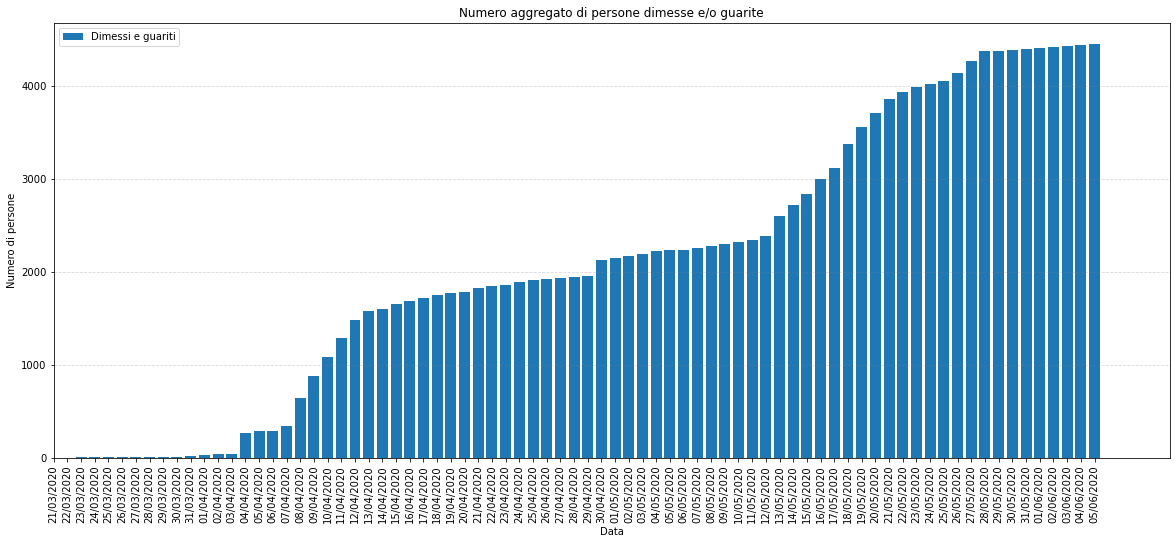

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], data['malati_dimessi_guariti'], label='Dimessi e guariti')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Numero aggregato di persone dimesse e/o guarite')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=25) # Remove data from 25-02 to 20-03
plt.savefig('images/andamento-ricoveri-10.png', bbox_inches='tight')
plt.show()

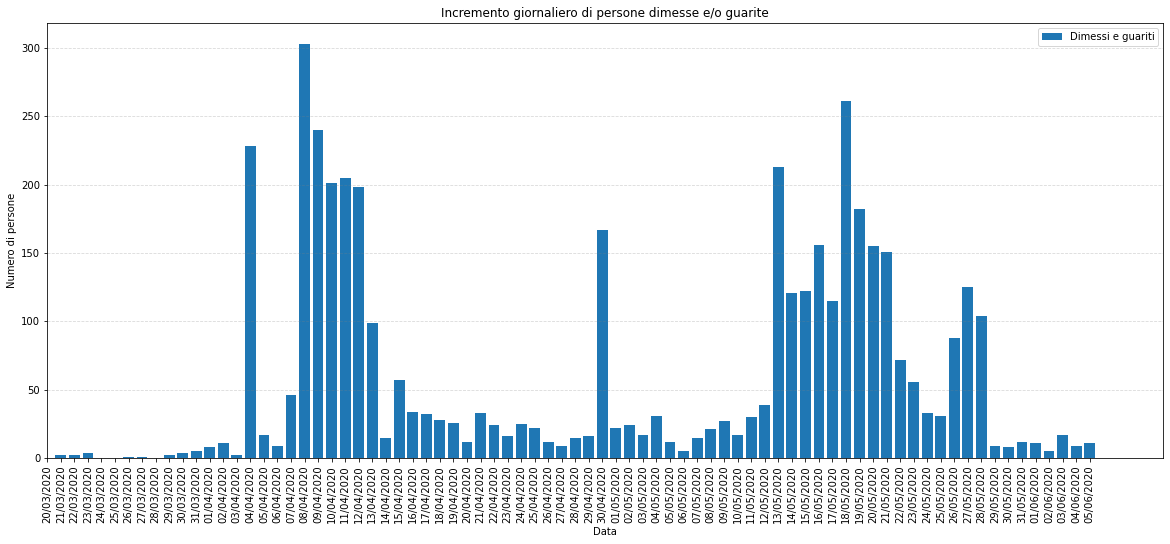

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['data'], data['malati_dimessi_guariti'].diff(), label='Dimessi e guariti')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Incremento giornaliero di persone dimesse e/o guarite')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=24) # Remove data from 25-02 to 19-03
plt.savefig('images/andamento-ricoveri-11.png', bbox_inches='tight')
plt.show()

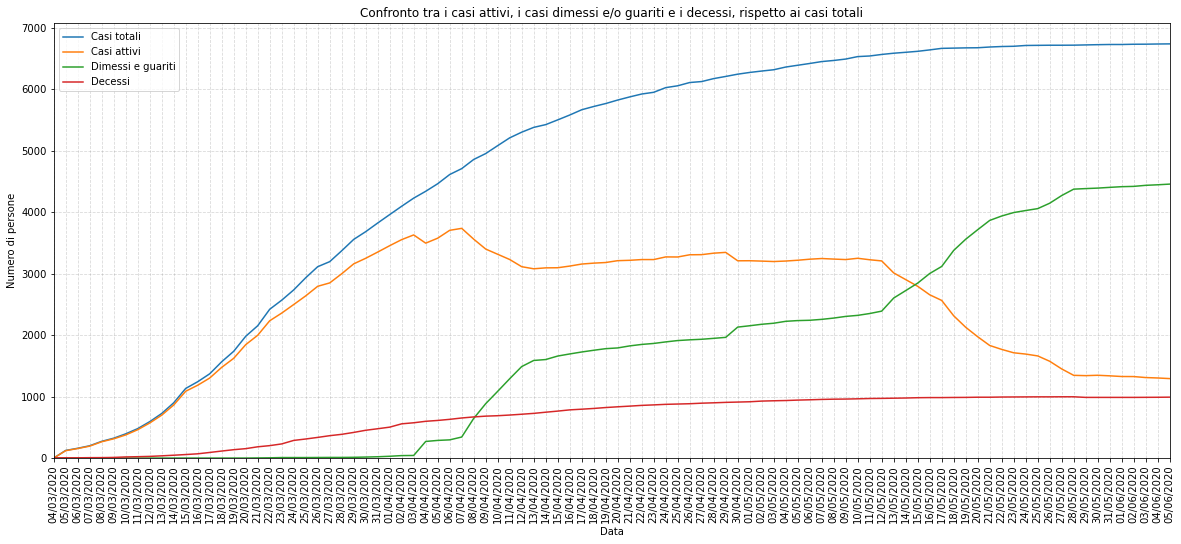

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['malati_totali_persone'], label='Casi totali')
ax.plot(data['data'], data['malati_attivi_persone'], label='Casi attivi')
ax.plot(data['data'], data['malati_dimessi_guariti'], label='Dimessi e guariti')
ax.plot(data['data'], data['decessi_totali_decessi'], label='Decessi')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Confronto tra i casi attivi, i casi dimessi e/o guariti e i decessi, rispetto ai casi totali')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-ricoveri-12.png', bbox_inches='tight')
plt.show()

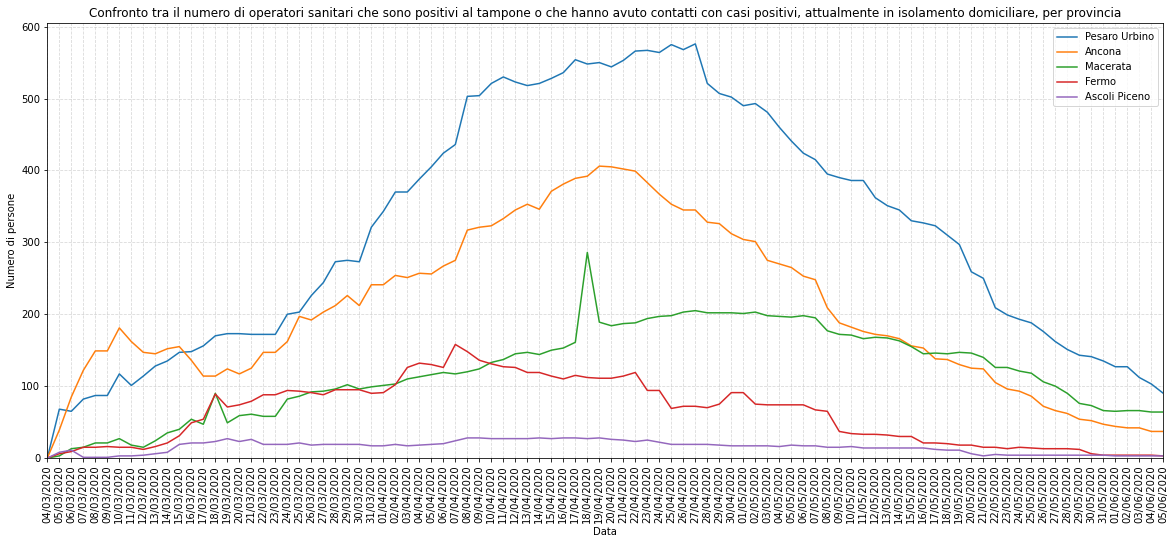

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_pesaro_urbino_attivi_operatori_sanitari'], label='Pesaro Urbino')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ancona_attivi_operatori_sanitari'], label='Ancona')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_macerata_attivi_operatori_sanitari'], label='Macerata')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_fermo_attivi_operatori_sanitari'], label='Fermo')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ascoli_piceno_attivi_operatori_sanitari'], label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Confronto tra il numero di operatori sanitari che sono positivi al tampone o che hanno avuto contatti con casi positivi, attualmente in isolamento domiciliare, per provincia')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-ricoveri-13.png', bbox_inches='tight')
plt.show()

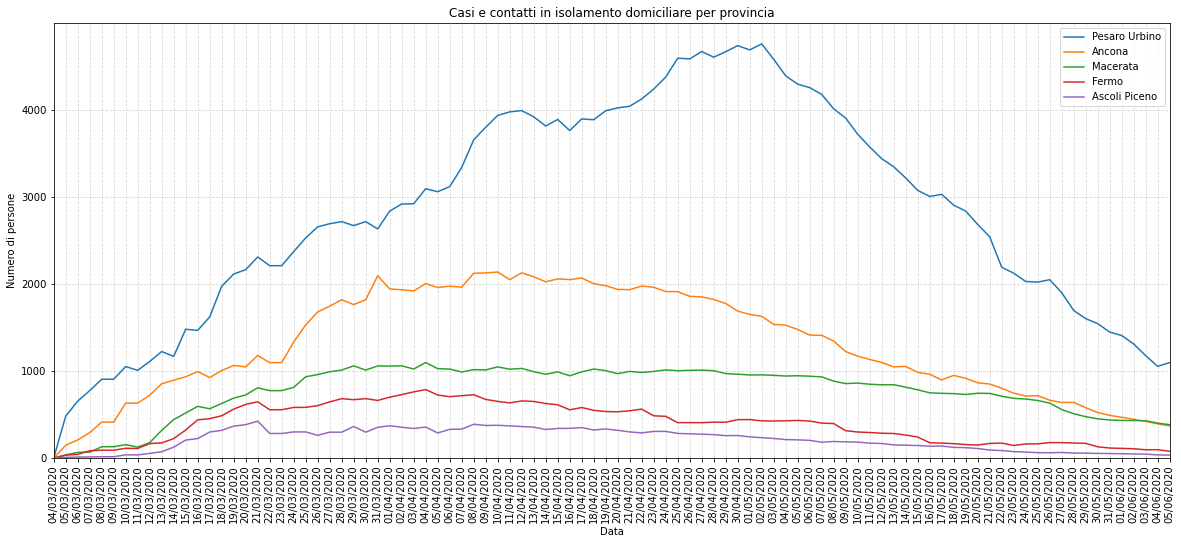

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_pesaro_urbino_attivi_totali'], label='Pesaro Urbino')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ancona_attivi_totali'], label='Ancona')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_macerata_attivi_totali'], label='Macerata')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_fermo_attivi_totali'], label='Fermo')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ascoli_piceno_attivi_totali'], label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Casi e contatti in isolamento domiciliare per provincia')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-ricoveri-14.png', bbox_inches='tight')
plt.show()

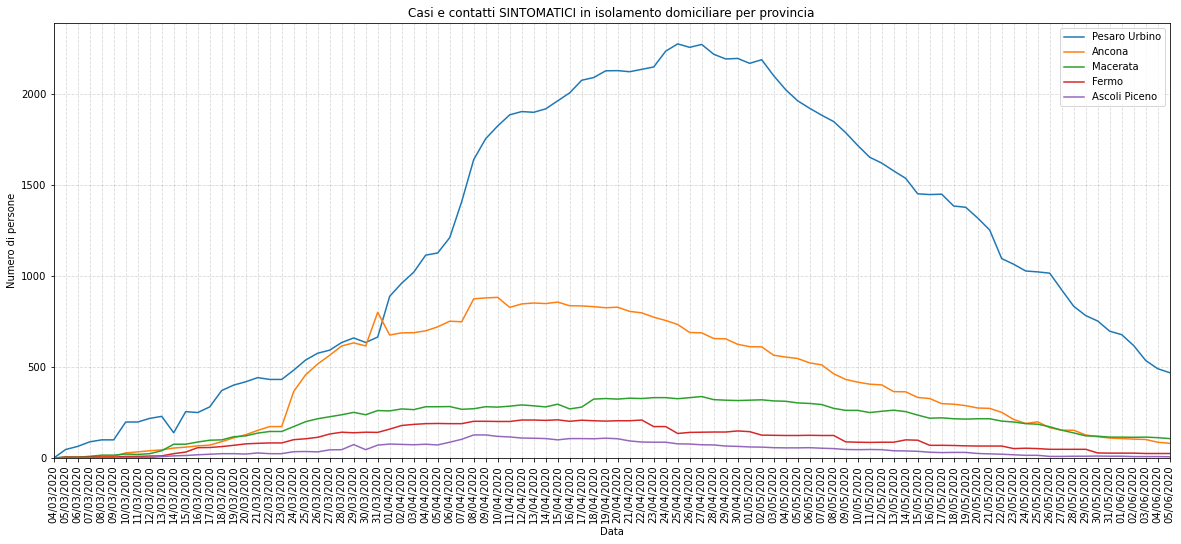

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_pesaro_urbino_attivi_sintomatici'], label='Pesaro Urbino')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ancona_attivi_sintomatici'], label='Ancona')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_macerata_attivi_sintomatici'], label='Macerata')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_fermo_attivi_sintomatici'], label='Fermo')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ascoli_piceno_attivi_sintomatici'], label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Casi e contatti SINTOMATICI in isolamento domiciliare per provincia')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-ricoveri-15.png', bbox_inches='tight')
plt.show()

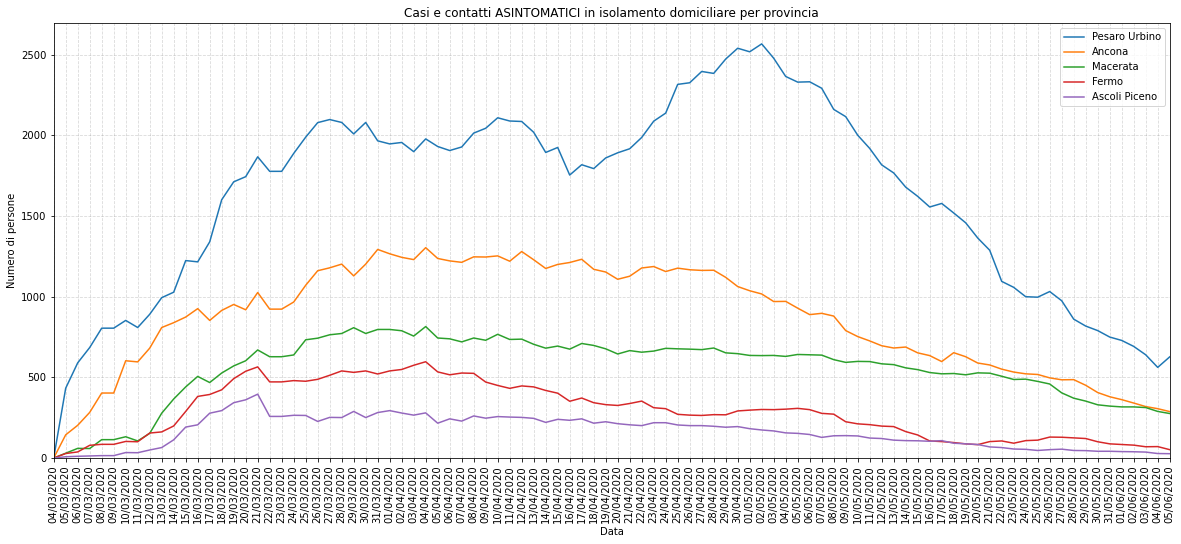

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_pesaro_urbino_attivi_asintomatici'], label='Pesaro Urbino')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ancona_attivi_asintomatici'], label='Ancona')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_macerata_attivi_asintomatici'], label='Macerata')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_fermo_attivi_asintomatici'], label='Fermo')
ax.plot(data['data'], data['malati_quarantena_domiciliare_provincia_ascoli_piceno_attivi_asintomatici'], label='Ascoli Piceno')
ax.set_xlabel('Data')
ax.set_ylabel('Numero di persone')
ax.set_title('Casi e contatti ASINTOMATICI in isolamento domiciliare per provincia')
ax.legend()

ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)

plt.xticks(data['data'], data['data'], rotation='vertical')
plt.xlim(left=8, right=last_update) # Remove data from 25-02 to 03-03
plt.ylim(bottom=0)
plt.savefig('images/andamento-ricoveri-16.png', bbox_inches='tight')
plt.show()